In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.cluster import KMeans, MiniBatchKMeans, BisectingKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import scale

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbs-combined/combined_sheet - combined_sheet.csv.csv
/kaggle/input/prods-raw/BBS.xlsx - 20-21.csv
/kaggle/input/prods-raw/BBS.xlsx - 18-19.csv
/kaggle/input/prods-raw/BBS.xlsx - 19-20.csv
/kaggle/input/prods-raw/BBS.xlsx - 17-18.csv


# data combining

In [ ]:
years=['20-21','19-20','18-19','17-18']
csv_folder_path = '/kaggle/input/prods-raw/BBS.xlsx - '

dfs = {}

for year in years:
    csv_path = csv_folder_path + f'{year}.csv'
    df = pd.read_csv(csv_path)
    df.rename(columns={'HS\nCode': 'code','Description of Commodities': f'des{year}','Quantity': f'qnt{year}','Value': f'val{year}'},inplace=True)
    dfs[year] = df

In [ ]:
dfs['19-20']

In [ ]:
comibined_df=pd.DataFrame()
    

In [ ]:
# Combine DataFrames based on HSCode
combined_df = dfs[years[0]]  # Start with the data from the first year

for year in years:
    dfs[year]['code'] = dfs[year]['code'].astype(str)

for year in years[1:]:
    combined_df = pd.merge(combined_df, dfs[year], on='code', how='outer')

# Rename Price columns with year suffix
for year in years:
    combined_df.rename(columns={'Value': f'val{year}'}, inplace=True)

# Sort the DataFrame based on HSCode
combined_df.sort_values(by='code', inplace=True)

In [ ]:
combined_df.head()

In [ ]:
combined_df.info()

export dataset


In [ ]:
combined_csv_path = 'combined_sheet.csv'
combined_df.to_csv(combined_csv_path, index=False)

# Using Combined data 

In [2]:
c_df=pd.read_csv('/kaggle/input/bbs-combined/combined_sheet - combined_sheet.csv.csv')
c_df.fillna(0, inplace=True)
c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18
0,70195910,0,0.0,0.000000e+00,0,0.0,0.0,0,0.0,0.0,FIBRE GLASS FILTER/STRAINERS,3455.0,1088597.0
1,70195990,0,0.0,0.000000e+00,0,0.0,0.0,0,0.0,0.0,OTHER FIBRE GLASS,39948.0,11506471.0
2,70199011,0,0.0,0.000000e+00,0,0.0,0.0,0,0.0,0.0,UNKNOWN,14693.0,7068502.0
3,70199019,0,0.0,0.000000e+00,0,0.0,0.0,0,0.0,0.0,UNKNOWN,14.0,30492.0
4,70199090,"ARTCL OF GLASS FIBRES,OTR",7388622.0,1.232659e+09,0,0.0,0.0,0,0.0,0.0,"ARTCL OF GLASS FIBRES,OTR",1348113.0,255173557.0


> All metal imported df

In [5]:
m_c_df = pd.DataFrame(columns=c_df.columns)

# Loop over each row in the original DataFrame
for index, row in c_df.iterrows():
    # Check the condition based on the 'code' column
    if  str(row['code']).startswith('72') or str(row['code']).startswith('73'):
        # Append the row to the new DataFrame if the condition is met
        m_c_df = m_c_df.append(row)

# Reset the index of the new DataFrame
m_c_df.reset_index(drop=True, inplace=True)

m_c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18
0,72,IRON OR STEEL,6.865766e+09,2.760791e+11,IRON OR STEEL,8.360293e+09,2.950291e+11,IRON OR STEEL,6.960985e+09,2.763346e+11,IRON OR STEEL,6.118993e+09,2.345690e+11
1,7201,PIG IRON BLOCK/OTR PRIMARY FO,8.522280e+06,3.628712e+08,PIG IRON BLOCK/OTR PRIMARY FOR,3.364934e+07,1.116999e+09,PIG IRON BLOCK/OTR PRIMARY FOR,1.285522e+08,4.291003e+09,PIG IRON BLOCK/OTR PRIMARY FO,9.191164e+07,2.824417e+09
2,72011000,"PIG IRON,N-ALOY<='5% PHSPHRS",8.522262e+06,3.628687e+08,"PIG IRON,N-ALOY<='5% PHSPHRS",3.364898e+07,1.115936e+09,"PIG IRON,N-ALOY<='5% PHSPHRS",1.285518e+08,4.290746e+09,"PIG IRON,N-ALOY<='5% PHSPHRS",9.185500e+07,2.819048e+09
3,72015000,ALLOY PIG IRON; SPIEGELEISEN,1.800000e+01,2.495000e+03,ALLOY PIG IRON; SPIEGELEISEN,3.540000e+02,1.062582e+06,ALLOY PIG IRON; SPIEGELEISEN,4.650000e+02,2.577530e+05,ALLOY PIG IRON; SPIEGELEISEN,5.664300e+04,5.368696e+06
4,7202,FERRO-ALLOYS,5.485431e+07,4.589605e+09,FERRO-ALLOYS,4.938500e+07,3.938348e+09,FERRO-ALLOYS,5.083866e+07,4.333239e+09,FERRO-ALLOYS,4.199913e+07,3.910932e+09


In [6]:
m_c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   code      427 non-null    object 
 1   des20-21  427 non-null    object 
 2   qnt20-21  427 non-null    float64
 3   val20-21  427 non-null    float64
 4   des19-20  427 non-null    object 
 5   qnt19-20  427 non-null    float64
 6   val19-20  427 non-null    float64
 7   des18-19  427 non-null    object 
 8   qnt18-19  427 non-null    float64
 9   val18-19  427 non-null    float64
 10  des17-18  427 non-null    object 
 11  qnt17-18  427 non-null    float64
 12  val17-18  427 non-null    float64
dtypes: float64(8), object(5)
memory usage: 43.5+ KB


In [7]:
for index, row in m_c_df.iterrows():
    # 'index' will contain the row index, and 'row' will contain the data in that row as a pandas Series
    # You can access individual values in the row using column names:
    q21 = row['qnt20-21']
    v21 = row['val20-21']
#     df.at[index, 'new_column'] = 'Value if condition is met'
    if(q21==0):
        m_c_df.at[index,'ppc21']=0
    else:
        m_c_df.at[index,'ppc21']=q21/v21
    
#     
    q20 = row['qnt19-20']
    v20 = row['val19-20']
#     df.at[index, 'new_column'] = 'Value if condition is met'
    if(q20==0):
        m_c_df.at[index,'ppc20']=0
    else:
        m_c_df.at[index,'ppc20']=q20/v20
        
    q19 = row['qnt18-19']
    v19 = row['val18-19']
#     df.at[index, 'new_column'] = 'Value if condition is met'
    if(q19==0):
        m_c_df.at[index,'ppc19']=0
    else:
        m_c_df.at[index,'ppc19']=q19/v19
        
# 
    q18 = row['qnt17-18']
    v18 = row['val17-18']
#     df.at[index, 'new_column'] = 'Value if condition is met'
    if(q18==0):
        m_c_df.at[index,'ppc18']=0
    else:
        m_c_df.at[index,'ppc18']=q18/v18
        

m_c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18,ppc21,ppc20,ppc19,ppc18
0,72,IRON OR STEEL,6.865766e+09,2.760791e+11,IRON OR STEEL,8.360293e+09,2.950291e+11,IRON OR STEEL,6.960985e+09,2.763346e+11,IRON OR STEEL,6.118993e+09,2.345690e+11,0.024869,0.028337,0.025190,0.026086
1,7201,PIG IRON BLOCK/OTR PRIMARY FO,8.522280e+06,3.628712e+08,PIG IRON BLOCK/OTR PRIMARY FOR,3.364934e+07,1.116999e+09,PIG IRON BLOCK/OTR PRIMARY FOR,1.285522e+08,4.291003e+09,PIG IRON BLOCK/OTR PRIMARY FO,9.191164e+07,2.824417e+09,0.023486,0.030125,0.029959,0.032542
2,72011000,"PIG IRON,N-ALOY<='5% PHSPHRS",8.522262e+06,3.628687e+08,"PIG IRON,N-ALOY<='5% PHSPHRS",3.364898e+07,1.115936e+09,"PIG IRON,N-ALOY<='5% PHSPHRS",1.285518e+08,4.290746e+09,"PIG IRON,N-ALOY<='5% PHSPHRS",9.185500e+07,2.819048e+09,0.023486,0.030153,0.029960,0.032584
3,72015000,ALLOY PIG IRON; SPIEGELEISEN,1.800000e+01,2.495000e+03,ALLOY PIG IRON; SPIEGELEISEN,3.540000e+02,1.062582e+06,ALLOY PIG IRON; SPIEGELEISEN,4.650000e+02,2.577530e+05,ALLOY PIG IRON; SPIEGELEISEN,5.664300e+04,5.368696e+06,0.007214,0.000333,0.001804,0.010551
4,7202,FERRO-ALLOYS,5.485431e+07,4.589605e+09,FERRO-ALLOYS,4.938500e+07,3.938348e+09,FERRO-ALLOYS,5.083866e+07,4.333239e+09,FERRO-ALLOYS,4.199913e+07,3.910932e+09,0.011952,0.012540,0.011732,0.010739


In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def scale_columns(df, cols=None):
    scaler = MinMaxScaler()
    if cols is None:
        cols = df.columns
    df[cols] = scaler.fit_transform(df[cols])
    return df

m_c_df = scale_columns(m_c_df, cols=['qnt20-21','qnt19-20','qnt18-19','qnt17-18','val20-21','val19-20','val18-19','val17-18'])

m_c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18,ppc21,ppc20,ppc19,ppc18
0,72,IRON OR STEEL,1.213311e-01,1.000000e+00,IRON OR STEEL,2.039681e-01,1.000000,IRON OR STEEL,2.316536e-01,1.000000e+00,IRON OR STEEL,0.196868,1.000000,0.024869,0.028337,0.025190,0.026086
1,7201,PIG IRON BLOCK/OTR PRIMARY FO,1.506049e-04,1.314374e-03,PIG IRON BLOCK/OTR PRIMARY FOR,8.209509e-04,0.003786,PIG IRON BLOCK/OTR PRIMARY FOR,4.278072e-03,1.552829e-02,PIG IRON BLOCK/OTR PRIMARY FO,0.002957,0.012041,0.023486,0.030125,0.029959,0.032542
2,72011000,"PIG IRON,N-ALOY<='5% PHSPHRS",1.506046e-04,1.314365e-03,"PIG IRON,N-ALOY<='5% PHSPHRS",8.209422e-04,0.003782,"PIG IRON,N-ALOY<='5% PHSPHRS",4.278057e-03,1.552735e-02,"PIG IRON,N-ALOY<='5% PHSPHRS",0.002955,0.012018,0.023486,0.030153,0.029960,0.032584
3,72015000,ALLOY PIG IRON; SPIEGELEISEN,3.180942e-10,9.037264e-09,ALLOY PIG IRON; SPIEGELEISEN,8.636623e-09,0.000004,ALLOY PIG IRON; SPIEGELEISEN,1.547467e-08,9.327568e-07,ALLOY PIG IRON; SPIEGELEISEN,0.000002,0.000023,0.007214,0.000333,0.001804,0.010551
4,7202,FERRO-ALLOYS,9.693800e-04,1.662424e-02,FERRO-ALLOYS,1.204858e-03,0.013349,FERRO-ALLOYS,1.691853e-03,1.568113e-02,FERRO-ALLOYS,0.001351,0.016673,0.011952,0.012540,0.011732,0.010739


In [9]:
train_m_df=m_c_df[['qnt20-21','qnt19-20','qnt18-19','qnt17-18','val20-21','val19-20','val18-19','val17-18']].copy()
tr_new_np=train_m_df.to_numpy()
type(tr_new_np)
len(tr_new_np)

427

In [10]:
from sklearn.cluster import KMeans, MiniBatchKMeans, BisectingKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import scale

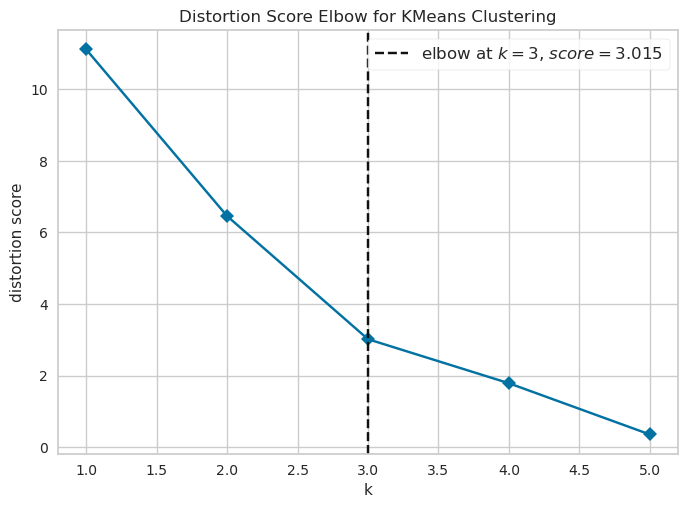

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6), timings= False)
visualizer.fit(tr_new_np)        # Fit data to visualizer
visualizer.show()

In [12]:
mb_model = MiniBatchKMeans(n_clusters = 3, batch_size=100, max_iter=300)
# v_tokens=model.wv.get_normed_vectors()

# type(avg_vec_list)
mb_model.fit(tr_new_np)
len(mb_model.labels_)

427

In [13]:
m_c_df['mb_cluster']=mb_model.labels_

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot(dataset,column):
    

    minibatch_groups = dataset.groupby(column).apply(lambda x: x.sort_values(by='mb_cluster'))
    num_clusters = len(minibatch_groups)
    num_cols = 3  # Number of columns to display

    num_rows = num_clusters // num_cols
    if num_clusters % num_cols != 0:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
    sorted_group = minibatch_groups.sort_values(by=price_column, ascending=False)

    for i, (cluster, group) in enumerate(minibatch_groups):
        prods = []
        for prod in group['des20-21']:
            prods.append(prod)
        common_tokens = pd.Series(tokens).value_counts().head(10)
        common_tokens = common_tokens.iloc[::-1]
        # Plot the most common words in a subplot
        ax = axes[i // num_cols, i % num_cols]
        common_tokens.plot(kind='barh', ax=ax)
        ax.set_title(f"Cluster {cluster}: Most Common Words")
        ax.set_xlabel("Words")
        ax.set_ylabel("Frequency")
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [15]:
for group_name, group_data in m_c_df.groupby('mb_cluster'):
    print(group_data['code'])

4          7202
16         7203
17     72031000
24     72044100
52     72083920
66         7209
71     72091700
80         7210
82     72101200
89     72104920
90     72104990
103    72107099
114        7212
116    72122010
158        7217
167        7219
201        7225
204    72253010
207    72254090
251        7304
252    73041110
283        7306
298        7307
313        7308
314    73081000
315    73082000
321    73089090
330        7311
332    73110020
365        7318
420        7326
426    73269090
Name: code, dtype: object
0            72
19         7204
25     72044900
37         7208
117    72122090
240          73
Name: code, dtype: object
1          7201
2      72011000
3      72015000
5      72021100
6      72021900
         ...   
421    73261100
422    73261900
423    73262010
424    73262090
425    73269010
Name: code, Length: 389, dtype: object


In [16]:
group_counts = m_c_df['mb_cluster'].value_counts()

print(group_counts)

2    389
0     32
1      6
Name: mb_cluster, dtype: int64


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for group_name, group_data in m_c_df.groupby('mb_cluster'):
    plt.barh((group_data['code']),group_data['val17-18'], label=group_name)
    plt.barh((group_data['code']),group_data['val18-19'], label=group_name)
    plt.barh((group_data['code']),group_data['val19-20'], label=group_name)
    plt.barh((group_data['code']),group_data['val20-21'], label=group_name)
    plt.xlabel('price')
    plt.ylabel('code')
    plt.title('Values within Each Group (Matplotlib)')
    plt.legend()
    plt.show()

In [ ]:
import numpy as np

plt.figure(figsize=(8, 6))
for group_name, group_data in m_c_df.groupby('mb_cluster'):
    plt.barh(group_data['code'], group_data['val17-18'], label='val17-18', color='blue')
    plt.barh(group_data['code'], group_data['val18-19'], label='val18-19', left=group_data['val17-18'], color='orange')
    plt.barh(group_data['code'], group_data['val19-20'], label='val19-20', left=group_data['val17-18'] + group_data['val18-19'], color='green')
    plt.barh(group_data['code'], group_data['val20-21'], label='val20-21', left=group_data['val17-18'] + group_data['val18-19'] + group_data['val19-20'], color='red')

plt.xlabel('price')
plt.ylabel('code')
plt.title('Values within Each Group (Matplotlib)')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
for cluster in m_c_df['mb_cluster'].unique():
    cluster_data = m_c_df[m_c_df['mb_cluster'] == cluster]
    plt.scatter(cluster_data['code'], cluster_data['mb_cluster'], label=f'Cluster {cluster}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [ ]:
m_c_df.sort_values(by='mb_cluster', ascending=True, inplace=True)
m_c_df.head()

In [ ]:
silhouette_avg = silhouette_score(tr_new_np, mb_model.labels_)
print(silhouette_avg)

In [ ]:
mb_cl_df = 'minibatch_combined_cluster.csv'
m_c_df.to_csv(mb_cl_df, index=False)

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Simulated data
np.random.seed(42)


def clustering_quality(n_clusters):
    gmm = GaussianMixture(n_components=n_clusters)
    labels = gmm.fit_predict(tr_new_np)
    quality_metric = silhouette_score(tr_new_np, labels)
    return -quality_metric  # Minimize negative silhouette score

# Try different numbers of clusters and evaluate the quality
num_clusters_list = range(3, 15)
silhouette_scores = []

max_score=-10
for num_clusters in num_clusters_list:
    score = clustering_quality(num_clusters)
    if (score>max_score):
        max_score=score
    silhouette_scores.append(score)

# Find the optimal number of clusters based on the maximum silhouette score
optimal_n_clusters = num_clusters_list[np.argmax(silhouette_scores)]

print("Silhouette Scores:", silhouette_scores)
print("Max Silhouette Scores:", max_score)
print("Optimal Number of Clusters:", optimal_n_clusters)

Silhouette Scores: [-0.9756556874446181, -0.9701405801602357, -0.9630559437987292, -0.6227209325331626, -0.6198116068930525, -0.5648915653442445, -0.608772570169532, -0.5647517979185206, -0.6455602221488588, -0.6441404839415131, -0.5834973168726665, -0.6888086760933714]
Max Silhouette Scores: -0.5647517979185206
Optimal Number of Clusters: 10


In [20]:
gmm = GaussianMixture(n_components=10)
labels = gmm.fit_predict(tr_new_np)
print(len(labels))
sli_gmm= silhouette_score(tr_new_np, labels)
print(sli_gmm)

427
0.6846051643151284


In [21]:
proba = gmm.predict_proba(tr_new_np)
print(proba.shape)
proba[3]

(427, 10)


array([9.99972614e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.24565941e-31, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.73862658e-05])

In [ ]:
m_c_df = m_c_df.drop('mb_cluster', axis=1)


In [24]:
m_c_df['gmm_cluster']=labels
# m_c_df.head()

group_counts = m_c_df['gmm_cluster'].value_counts()

print(group_counts)

0    337
9     76
5      6
6      2
1      1
8      1
7      1
4      1
2      1
3      1
Name: gmm_cluster, dtype: int64


In [25]:
m_c_df.sort_values(by='gmm_cluster', ascending=True, inplace=True)
m_c_df.head()

,code,des20-21,qnt20-21,val20-21,des19-20,qnt19-20,val19-20,des18-19,qnt18-19,val18-19,des17-18,qnt17-18,val17-18,ppc21,ppc20,ppc19,ppc18,mb_cluster,gmm_cluster
213,72259990,OTHER,4.269532e-08,0.000001,OTHER,5.830940e-09,0.000001,OTHER,0.000003,0.000054,UNKNOWN,0.000002,0.000024,0.006261,0.000767,0.006409,0.010495,2,0
369,73181410,IMPORTED BY PRE-FEBRICATED,1.933200e-06,0.000097,IMPORTED BY PRE-FEBRICATED,6.948090e-07,0.000041,IMPORTED BY PRE-FEBRICATED,0.000003,0.000126,IMPORTED BY PRE-FEBRICATED,0.000003,0.000094,0.004095,0.002379,0.002749,0.004668,2,0
227,72279090,OTHER,5.071435e-05,0.000850,UNKNOWN,1.120477e-04,0.000852,UNKNOWN,0.000002,0.000018,0,0.000000,0.000000,0.012225,0.018281,0.014490,0.000000,2,0
226,72279010,OTHER,2.257057e-05,0.000345,UNKNOWN,3.537380e-06,0.000051,0,0.000000,0.000000,0,0.000000,0.000000,0.013420,0.009556,0.000000,0.000000,2,0
225,72279000,0,0.000000e+00,0.000000,0,0.000000e+00,0.000000,"OTR BAR & ROD, HOT-ROLLED",0.000101,0.000670,"OTR BAR & ROD, HOT-ROLLED",0.000086,0.000686,0.000000,0.000000,0.016345,0.016624,2,0


In [26]:
mb_cl_df = 'Gaussian_mixer_cluster(silhouette_scores_as_entropy_func).csv'
m_c_df.to_csv(mb_cl_df, index=False)

**todo use other cluster algorithm (hierarchical) **